### **Your name**: 

# Spectral analysis assignment (50 points)

In this assignment you will perform a set of operations involving spectra.  

**This assignment is due at noon on September 13.**  Your final version needs to be uploaded to your github repository by this time.

By the end of this activity you will have learned how to do the following things:
* Read in spectral files for stars
* determine the dispersion of the spectrograph in Angstrom/pixel
* plot the spectra of three stars
* measure $f_\lambda$ of each star at a specific wavelength.
* Given a frequency, derive $f_\nu$ at that frequency
* plot the filter curve of the B and V filters on top of the stellar spectra
* Calculate the B-V color of each star by convolving the spectrum with the appropriate filter curves.  compare to the published values.  During this step you will do the following calculations:
  * measure the magnitude using the central flux in each filter
  * Figure out your own way to estimate the color more accurately using the filter curve
  * repeat the same procedure using the speclite library (https://speclite.readthedocs.io/en/latest/index.html) to get the "correct" answer.
  * comment on the differences
  
Places where you need to fill in code will be indicated with a #### Write code here. If the part you have to enter is in the middle of a block of code the area that ends where you have to enter code will end with #---- Some of these will not be directly linked to points because they are simply bookkeeping things that depend on your own computer. Other sections that specify specific problems will be indicated with a  
### Problem
statement.  Please read everything carefully to find all the places you will need to enter code.

You will need to execute all blocks of code.

**Comments are important**: You need to comment your code thoroughly so that I know what you did and why you did it. It will make it easier for me to give you credit. You should add comments in the code and also feel free to add new markdown cells with the format of the cell below.


*student comment* : I did something interesting below

## The spectral library

We will be using the <a href=https://www.noao.edu/cflib/>"Indo-US Spectral Atlas" </a> of bright stars.  I have downloaded two stellar spectra and they are included in my github repository.

In some of the code below, the explanation will be in the commented text within the code block, so make sure to read all of it.

## Importing modules, packages, and libraries

The first step will be to import the necessary components.

In [2]:
#This library stores filter response curves and contains functions to convolve them with spectra
import speclite.filters                         

#the library that allows you to read, store, and manipulate tables
from astropy.table import Table

#Pyplot is what we will use to make many of our plots.
from matplotlib import pyplot as plt

#allows you to execute commands directly to the operating system
import os           

#this is a useful python module that allows you to assign explicit units to numbers that 
#python uses to handle unit conversions and to perform calculations.  It can be a little
#hard to get used to but is very useful once you learn how to use it.
from astropy import units as u

#built-in physical constants
from astropy import constants as c

import numpy as np

## Reading in the Files 

The next step will be to read in the files.  I encourage you to open each of the \*.txt files that contain the stellar spectra to see what they look like.  You can do this in Jupyter Lab or using the "*more \<filename\>*" at the command line.  Don't modify the files or you will make it impossible to complete the assignment.  We will read each text file into an "astropy Table".  These are described at https://docs.astropy.org/en/stable/table/index.html and are a useful way to read in and store text data.

### Problem 1 (5 points)
Complete the missing sections of the code.

In [4]:
#Use an OS command to get the path to your home directory
homedir = os.getenv("HOME")

#here you will need to specify the directory tree that points to your spectrum files.  
#This directory starts in your home directory so you don't need to type, e.g.  /home/<username>/
#In the commented code below I've shown you how I did it for my computer but you need to set it up for your computer.
#### Write code here
#specdir = homedir+'/Work/Teaching/Classes/Astro_596/Fall_2021/Computer_projects/ASTR596_F23/Stellar-spectral-analysis/'
specdir = homedir+'/ASTR596/My_repositories/Stellar-spectral-analysis/'
#------
#this moves you to specdir so that you don't need to specify the path every time you read in a file.
os.chdir(specdir)

#this command reads the wavelength and flux of 95418.txt into a variable called star1.  
#The 'names' kwarg specifies the names of the columns
star1 = Table.read('95418.txt',format='ascii', names=('lambda','flam'))
display(star1)               #display the value of the table

#Now I would like you to read 165341.txt into a variable called star3.  
#Display the values for the table

#### Write code here
star3 = Table.read('165341.txt',format='ascii', names=('lambda','flam'))
display(star3)

#-------
#scale the flux of each star to have the same flux as Vega at 5500 Ang.
#At 5500 Ang, Vega has a flux of 3.44x10^(-9) erg/s/cm^2/Ang
#########remember that if you rerun your jupyter notebook that this operation will 
#########be executed over and over again.
fvega5500 = 3.44e-9
star1['flam'] *= fvega5500
##star2['flam'] *= fvega5500
star3['flam'] *= fvega5500

lambda,flam
float64,float64
3465.0,0.9348064
3465.4,0.9298626
3465.8,0.9295582
3466.2,0.9163543
3466.6,0.9428962
3467.0,0.9729065
...,...
9466.601,0.2129272
9467.0,0.2132561


lambda,flam
float64,float64
3465.0,0.3538652
3465.4,0.2905372
3465.8,0.2453179
3466.2,0.2475912
3466.6,0.2801426
3467.0,0.3293486
...,...
9466.601,0.0001
9467.0,0.0001


## Compute the dispersion of the spectra

### Problem 2 (5 points)

Using the print outs of the spectra above, enter the dispersion of each spectrum.  That is, what is the spacing in Angstroms between each adjacent flux point?

**Enter your answers here**
* star 1: .014
* star 3: .158


## Plot the spectra 

### Problem 3 (5 points)
Here you will plot the spectrum of the stars.  I will plot the first one and you will plot the others.  Note that the stars have the same flambda at 5500 Angstroms.  This is because we scaled the stars to have the same flux as Vega at a wavelength of 5500 Ang.

You will provide the right statement in the function below and then run it in the following cell.

See https://matplotlib.org/stable/tutorials/introductory/pyplot.html for a tutorial on using pyplot in matplotlib to make nice plots.

In [15]:
def starplot():
    # use pyplot to plot each star
    #this initializes a figure with a given size
    plt.figure(figsize=(8,8))
    #this plots the wavelength and flux of the star, makes the color of the line blue, 
    #and sets the label in the legend to say "star1"
    plt.plot(star1['lambda'],star1['flam'], color='blue', label='star1')

    #this sets the x-range of the plot.  The y-range is scaled automatically
    plt.xlim([3500,7500])

        #this provides x and y-axis labels.  The "size" command gives the size of the font
    plt.xlabel('$\lambda$ [$\AA$]',size=20)
    plt.ylabel('$f_\lambda$ normalized to $f_\lambda(Vega)$ at 5000$\AA$ [erg/s/cm$^2/\AA$]', size=20)
    
    #this sets the tick size to be easily readable
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    #this plots the legend and sets the size of the text in the legend
    plt.legend(fontsize=20)

    
    #Now I want you to plot the other star in the same way, 
    #with star 3 in magenta.  Make sure to include the name of the 
    #star in the legend label
    #### Write code here
    plt.figure(figsize=(8,8))
    plt.plot(star3['lambda'],star3['flam'], color='magenta', label='star3')
    plt.xlim([3500,7500])
    #----

    #this provides x and y-axis labels.  The "size" command gives the size of the font
    plt.xlabel('$\lambda$ [$\AA$]',size=20)
    plt.ylabel('$f_\lambda$ normalized to $f_\lambda(Vega)$ at 5000$\AA$ [erg/s/cm$^2/\AA$]', size=20)
    
    #this sets the tick size to be easily readable
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    #this plots the legend and sets the size of the text in the legend
    plt.legend(fontsize=20)



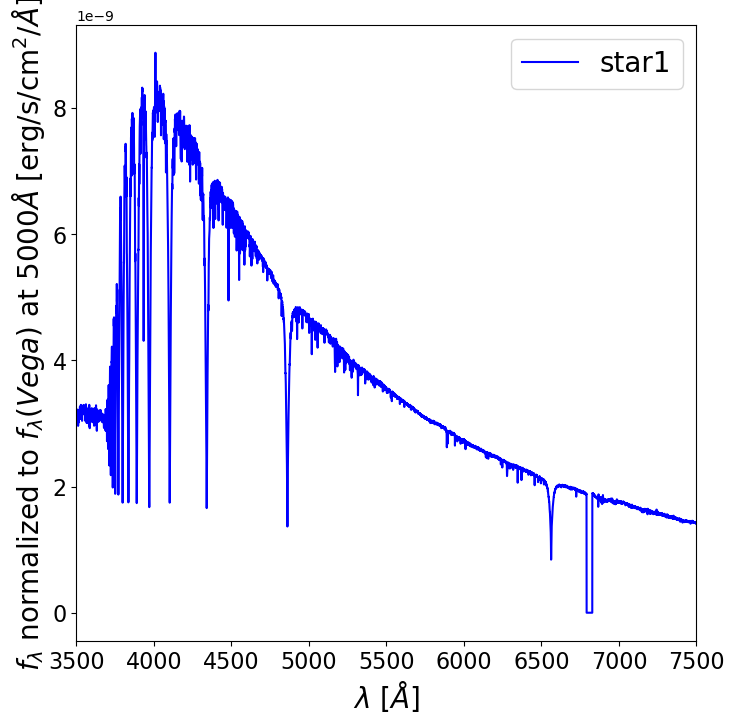

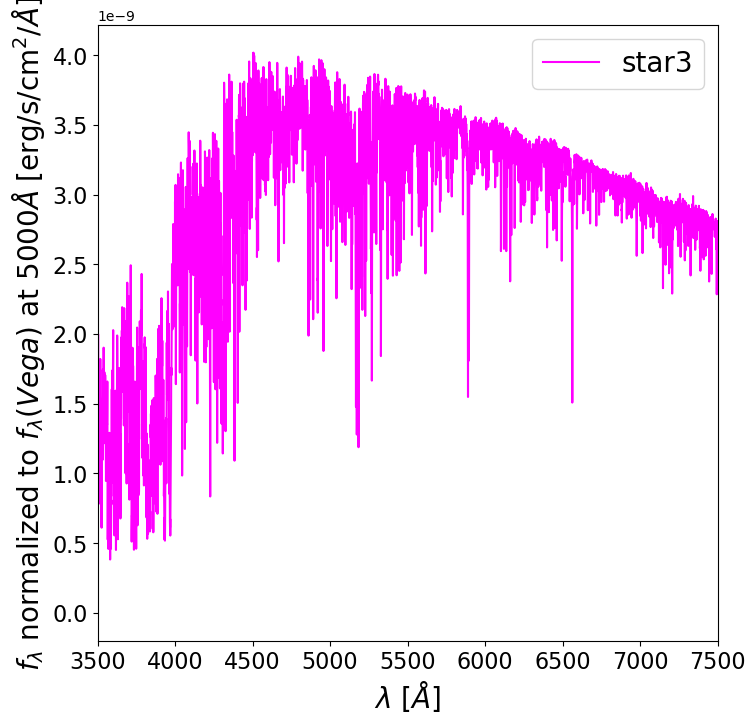

In [16]:
#this calls the function from above
starplot()
#this causes the plot to display
plt.show()

### Problem 4 (5 points)
Comment on the differences and similarities between the three spectra.  Write your answer in an empty markdown below this one. *Note: the strange dip in the blue spectrum at ~6800 is from the instrument and not the star.*

answer here: Star 1 peaks at 4000 Angstroms while star 3 peaks somewhere between 4500 and 5000 Angstroms. The flux of star 3 only goes to 4 while star 1 has a flux that goes up to 8. In terms of similarities, the most notable is that they both start low and then peak and go back down although star 1 appears to have a nonlinear decay while star 3 has a more linear regression.

## Measure the monochromatic flux density of each star at 4500 Angstroms

You will now need to find the closest flux point to the one at 4500 and 6500 Angstroms and print it out.  This will be the monochromatic flux density in $f_\lambda$.

I will start by showing you how to extract the $f_\lambda$ of star 1 at 4500 Anstroms

In [ ]:
#these are the reference wavelengths in angstroms
lamref1 = 4500.0
lamref2 = 6500.0

#to select a given wavelength we will make a new array 
#that is filled with the absolute value of the difference between the reference wavelength 
#and our wavelength array.  
star1_difflam_ref1 = abs(star1['lambda'] - lamref1)

#now find the wavelength that is closest to lamref1 by using the 'argmin' function in python
#which returns the *index* that corresponds to the minimum value of the array
minind_star1_difflam_ref1 = np.argmin(star1_difflam_ref1)

#now we can use this index to find the wavelength and flux closest to the reference 
#wavelength by adding on a second index field to the star1 array.  star1['flam'] is 
#an array and by adding a second index field we can access elements of that array.
#we assign these indexed values to two new variables.
flam_star1_lamref1 = star1['flam'][minind_star1_difflam_ref1]
star1_lamref1 = star1['lambda'][minind_star1_difflam_ref1]

print('flam of star1 at', star1_lamref1, 'Angstroms = ', star1['flam'][minind_star1_difflam_ref1])


### Problem 5 (15 points)
In the following code blocks you will need to write code that allows you to:
1. (5 points) retrieve $f_\lambda$ from star1 and 3 at 2 reference wavelengths of 4500 and 6500 Angstroms (I  showed you above how to do this for star 1 at 4500 Anstroms);
2. (5 points) calculate $f_\nu$ at each of these reference wavelengths for both stars.  Your answer should be in erg/s/cm$^2$/Hz;
3. (5 points) comment on how $f_\lambda$ and $f_\nu$ compare between the stars at each wavelength.  For example, is the brightest star in $f_\lambda$ at one wavelength the same as the brightest star in $f_\nu$ at that same wavelength, or not.  Explain why is this so.

To do part 1, I want you to make similar print statements for $f_\lambda$ for the second reference wavelength for star 1 and for both reference 
wavelengths for star 3.  Treat every star's wavelength array as different as in general you 
don't know if they all have the same length or spacing.

Also make sure you print them out in a way that is easy for me to understand.  You 
can use my code as a template for how this print statement should look.  I've included that print statement at the end of the code blocks.

This section might seem a bit long, but with the exception of the last calculations should just
be based on what I did above.  I will provide some small hints throughout.

In [ ]:
#### Write code here for 5.1


#construct the wavelength difference array for all the star and reference wavelength combinations.
star3_difflam_ref1 =              #star 3, lambda 1

star1_difflam_ref2 =              #star 1, lambda 2
star3_difflam_ref2 =              #star 3, lambda 2

#find the minimum value of this difference
minind_star3_difflam_ref1 = np.argmin()       #star 3, lambda 1

minind_star1_difflam_ref2 = np.argmin()       #star 1, lambda 2
minind_star3_difflam_ref2 = np.argmin()       #star 3, lambda 2

#find the wavelength at the minimum value of the difference by using the index you just fond
star3_lamref1 =    #star 3, lambda 1

star1_lamref2 =    #star 1, lambda 2
star3_lamref2 =    #star 3, lambda 2

#find the flux at that wavelength by using the index you just fond
flam_star3_lamref1 =    #star 3, lambda 1

flam_star1_lamref2 =    #star 1, lambda 2
flam_star3_lamref2 =    #star 3, lambda 2


#now print out the values
print()
print('flam of star3 at', star3_lamref1, 'Angstroms = ', flam_star3_lamref1)
print()
print('flam of star1 at', star1_lamref2, 'Angstroms = ', flam_star1_lamref2)
print('flam of star3 at', star3_lamref2, 'Angstroms = ', flam_star3_lamref2)

#as an internal check, verify to yourself that the wavelengths correspond closely 
#to the reference wavelengths and check your answers against the figure above



now I want you to use the values of $f_\lambda$ and $\lambda$ to to compute $f_\nu$ in erg/s/cms$^2$/Hz .
I want you to do this for star1 **and** star 3
For the conversion, if you choose you can assume that the reference wavelengths for each star are exactly at 4500 and 6500 Angstroms, even though those won't be exactly right.

Print out the values so that I know which values are which.

In the formula you use to get $f_\nu$ you need to make sure that the units of your answer make sense.

In [ ]:
#### Write code here for 5.2

#find the frequency at the reference wavelength
#convert lamref1 to m and then to Hz

nu_ref1 = 

nu_ref2 = 

#hint: make sure that c has the right units so that your answer is in erg/s/cm^2/Hz
fnu_star1_lamref1 = flam_star1_lamref1 *
fnu_star3_lamref1 = flam_star3_lamref1 * 

fnu_star1_lamref2 = flam_star1_lamref2 * 
fnu_star3_lamref2 = flam_star3_lamref2 * 

print()
print('fnu of star1 at', star1_lamref1, 'Angstroms = ', fnu_star1_lamref1)
print('fnu of star3 at', star3_lamref1, 'Angstroms = ', fnu_star3_lamref1)
print()
print('fnu of star1 at', star1_lamref2, 'Angstroms = ', fnu_star1_lamref2)
print('fnu of star3 at', star3_lamref2, 'Angstroms = ', fnu_star3_lamref2)
#----

### 5.3 Looking at the plot of the spectra above, comment on the relative rankings of flambda and fnu at both reference wavelengths.  Does the ranking correspond to your expectations?  Justify your answer.
put answer here

### Estimate the color of the spectra using the filter curves
Now we will plot our filter curves on top of the spectra with an arbitrary normalization.  You will then estimate the color of each star in three different ways.  


In [ ]:
#This calls the plotting function from earlier in the code and plots the stars
starplot()

#this now reads in the filter traces and overplots them
#now read in "g" and "r" filter curves from speclite.  
gband = speclite.filters.load_filter('sdss2010-g')
rband = speclite.filters.load_filter('sdss2010-r')
#normalize the filter response curves so that they fits on our plot, 
#since they are usually plotted from 0 to 1.

#For speclite output, the values are referenced using the .wavelength and .response
#you can access individual gband.wavelength is an array that can be accessed using indices
#like gband.wavelength[22]
plt.plot(gband.wavelength,gband.response * 3.e-9,linewidth=5)
plt.plot(rband.wavelength,rband.response * 3.e-9,linewidth=5)

#this causes the plot to display
plt.show()


## Boolean arrays - A way to access a given set of elements in an array

This section provides some useful background that you may choose employ for exercise #6.2 below.

If you have an array, you can perform queries based on values of that array.  These queries return "Boolean arrays", which will contain True or False values depending on whether the element of the array meets the criteria.  You can then use these Boolean arrays to only access the value you would

In [ ]:
#this example shows you how to create and use a boolean array witha single argument
a = np.array([1,2,3,4,5])           #create an array
#perform a query.
#I always end the the output of a Boolean query out with "flag" so that I know it's a 
#Boolean array
asmallflag = a < 4           

#you can see that only the first three elements of asmall are "True"
print('A boolean array that selects small a values:', asmallflag)

#now using 'abig' as an array of indices for 'a' you can print out only the elements of a 
#that meet your query, that is, those that have True indices
print('Only the elemens of a for which the query yielded a True:', a[asmallflag])

#Now let's make a second array with the same length as a
b = np.array(['aa','bb','cc','dd','ee'])

# in this case, b could be names of object in a table and a could be some value associated 
#with those objects.  Since they have the same length, same order, **and** refer to the same set of data
#we can apply the 'abig' Boolean array to find out which elements of b are selected when we 
#perform our query on a
print('Only the elements of b that were selected by the previous query:', b[asmallflag])

#that's pretty cool!  But wait, there's more
#you can also make Boolean arrays by combining different conditions.  You can do this two different
#wasy.  
#First, you can set up a single query with two conditions, each enclosed in ()
amidflag = (a>2) & (a<4)
print('The elements of a and b that meet the new criteria: ', a[amidflag], b[amidflag])

#but I can also make individual Boolean arrays and combine them with a logical AND (&) command.
#Only elements that are True in both input arrays are true in the output array
abigflag = a>2
amidflag2 = abigflag & asmallflag
print('The results of combining the two previous selections:',amidflag2, a[amidflag2])

#and finally, we can assign only the values that satisfy a boolean command to a new arraw.
#in this case, only values of a with True indicies in amidflag2 will be assigned to c
onlymidvalues = a[amidflag2]
print(c)

#in the exercise below, we will use this technique to print out the flux at a point
#on the spectrum with a given wavelength

### Problem 6 (15 points)
Using the plot above write two blocks of code.  
1. (5 points) Estimate by eye the central wavelength of each filter, using the plotted filter curves.  Note this is the central wavelength, not the peak wavelength.  Then use this wavelength as in the exercise above to determine 
    * fnu for each filter and each star
    * the AB magnitude for each filter and each star
    * the g-r color for each star
    * make sure all of these are clearly printed out.
    * In the textbox following the code block discuss your answers and if they make sense
2. (5 points) Now come up with your own method of estimating the fnu using the full filter curve.  There are multiple ways to do this.  If you don't have a lot of computing experience, you should try an approximation for the filter shape that will allow you to better compute the average flux within the filter (*note the filter curves are fairly flat with sharp edges*).  If you want to try something more challenging, you can code up the full filter integral. Regardless of your choice, with that value of fnu, compute the AB magnitudes and filters as in the exercise above. 
    * It's great if you want to integrate the filter curve, but it is more complex because the filter and spectrum have different wavelength spacing and you have to interpolate the filter curve to match the spectra wavelength spacing.  Let me know if you're interested and I can help you do this.
3. execute my block of code that computes the correct answers using the speclite package.  This package actually integrates the filter curves.  **Note that you will not get credit for just matching the correct answer.  I am including it so that you can comment on any differences in the following part.  I will grade you on how you get your answer, not whether your answer matches mine.**
4. (5 points) Compare your colors with the plots of the spectra and comment on whether they make sense. .  

In [ ]:
#### Write code here for 6.1

#put your estimate for the central wavelength here
lamrefg = 
lamrefr = 

#construct the wavelength difference array for all the star and reference wavelength combinations.
star1_difflam_refg = 
star1_difflam_refr = 

star3_difflam_refg = 
star3_difflam_refr = 

#now find the wavelength that is closest to lamref1 by using the 'argmin' function in python
#which returns the index that corresponds to the minimum value
minind_star1_difflam_refg = np.argmin()
minind_star1_difflam_refr = np.argmin()

minind_star3_difflam_refg = np.argmin()
minind_star3_difflam_refr = np.argmin()

#now we can use this index to find the wavelength and flux closest to the reference 
#wavelength by adding on a second index field
#we assign these values to new variables.
flam_star1_lamrefg = star1['flam'][minind_star1_difflam_refg]
flam_star1_lamrefr = star1['flam'][minind_star1_difflam_refr]

flam_star3_lamrefg = star3['flam'][minind_star1_difflam_refg]
flam_star3_lamrefr = star3['flam'][minind_star1_difflam_refr]

#the frequency corresponding to the reference wavelengths
nu_refg = 

nu_refr = 

#hint: make sure that c has the right units so that your answer is in erg/s/cm^2/Hz
fnu_star1_gband = 
fnu_star3_gband = 

fnu_star1_rband = 
fnu_star3_rband = 


#print your fnu's here with the following format
print('fnu of star1 at the g-band = ', fnu_star1_gband)
print('fnu of star1 at the r-band = ', fnu_star1_rband)
print('fnu of star3 at the g-band = ', fnu_star3_gband)
print('fnu of star3 at the r-band = ', fnu_star3_rband)


#AB mag for each filter and star
#your calculations

ABmag_star1_gband = 
ABmag_star1_rband = 
ABmag_star3_gband = 
ABmag_star3_rband = 

#print your AB mags here with the following format
print('AB of star1 at the g-band = ', ABmag_star1_gband)
print('AB of star1 at the r-band = ', ABmag_star1_rband)
print('AB of star3 at the g-band = ', ABmag_star3_gband)
print('AB of star3 at the r-band = ', ABmag_star3_rband)

#g-r color for each star
#your calculations

gr_star1 = 
gr_star3 = 

#print your colors here with the following format
print('g-r color of star1 = ', gr_star1)
print('g-r color of star3 = ', gr_star3)


For part 6.2, I won't tell you what to do.  I want you to come up with your own way.  To get full credit you will need to get a valid answer.  Even one step more sophisticated than the previous part is enough but you need to get a valid answer to get full credit.  You will get partial credit depending on how far you get.

In [ ]:
#### Write code here for 6.2

#I'm assuming that you did your calculation for fnu above this line
fnu_star1_gband = 
fnu_star1_rband = 

fnu_star3_gband = 
fnu_star3_rband = 


#print your fnu's here with the following format
print('fnu of star1 at the g-band = ', fnu_star1_gband)
print('fnu of star1 at the r-band = ', fnu_star1_rband)
print('fnu of star3 at the g-band = ', fnu_star3_gband)
print('fnu of star3 at the r-band = ', fnu_star3_rband)

#AB mag for each filter and star
#your calculations

#print your AB mags here with the following format
ABmag_star1_gband = 
ABmag_star1_rband = 
ABmag_star3_gband = 
ABmag_star3_rband = 

#print your AB mags here with the following format
print('AB of star1 at the g-band = ', ABmag_star1_gband)
print('AB of star1 at the r-band = ', ABmag_star1_rband)
print('AB of star3 at the g-band = ', ABmag_star3_gband)
print('AB of star3 at the r-band = ', ABmag_star3_rband)

#g-r color for each star
#your calculations

gr_star1 = 
gr_star3 = 

#print your colors here with the following format
print('g-r color of star1 = ', gr_star1)
print('g-r color of star3 = ', gr_star3)


## Check your work

The code below derives magnitudes and colors using the full filter convolution using speclite.  This takes into account both the full filter shape and the full spectrum.  You will just need to execute this code and compare to your answers in 6.3.


In [ ]:
#we need to create "validated" wavelength arrays that conform to the 
#characteristics needed as input by speclite
#we use the units module to assign specific units to all wavelength and fluxes, as 
#speclite needs this to run properly.
star1lam = speclite.filters.validate_wavelength_array(star1['lambda']*u.AA)
star3lam = speclite.filters.validate_wavelength_array(star3['lambda']*u.AA)

#specify the flux unit of the input flux of our stars using the astropy units package
#these units will be associated with any number they are multiplied by.
fluxunit = u.erg/u.s/u.cm**2/u.AA

#these are useful speclite built in functions that
#1. integrate the spectrum over the filter curve
#2. divide it by the integral of just the filter curve, thus performing an average
#of the spectrum weighted by the filter curve 
#3. convert the average flux to fnu
#4. compute the AB magnitude
ABmag_star1_gband = gband.get_ab_magnitude(star1['flam']*fluxunit,wavelength=star1lam*u.AA)
ABmag_star1_rband = rband.get_ab_magnitude(star1['flam']*fluxunit,wavelength=star1lam*u.AA)

ABmag_star3_gband = gband.get_ab_magnitude(star3['flam']*fluxunit,wavelength=star3lam*u.AA)
ABmag_star3_rband = rband.get_ab_magnitude(star3['flam']*fluxunit,wavelength=star3lam*u.AA)

print('AB of star1 at the g-band = ', ABmag_star1_gband)
print('AB of star1 at the r-band = ', ABmag_star1_rband)
print('AB of star3 at the g-band = ', ABmag_star3_gband)
print('AB of star3 at the r-band = ', ABmag_star3_rband)

gr_star1 =ABmag_star1_gband - ABmag_star1_rband
gr_star3 = ABmag_star3_gband - ABmag_star3_rband

#print your colors here with the following format
print('g-r color of star1 = ', gr_star1)
print('g-r color of star3 = ', gr_star3)


### 6.3 Check your answer and comment

Comment on how the colors compare to the spectra in the plot and to the differences between your two techniques.  Also compare to the correct answer given in the last cell.  Discuss why your techniques might have given different answers or the same.

Your answer goes here